In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-train.csv")
df_train=data.copy()



In [2]:
# Size Of the Data 
df_train.shape


(614, 13)

In [3]:
df_train.isnull().values.any()

True

In [4]:
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df_train)



,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [6]:
# Duplicated data
df_train[df_train.duplicated() == True]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [7]:

#check for null
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:

df_train_clean=df_train.copy()
df_train_clean=df_train_clean.dropna()
df_train_clean.drop(['Loan_ID'],inplace=True,axis=1)
df_train_clean.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
#data preprocessing
df_train_num=df_train_clean.copy()
Gender= {'Male':0,'Female':1}
Married= {'Yes':1,'No':0}
Education= {'Graduate':1,'Not Graduate':0}
Self_Employed= {'Yes':1,'No':0}
Dependents= {'0':0,'1':1,'2':2,'3+':3}
Loan_Status= {'Y':1,'N':0}
Rural={'Rural':1,'Urban':0,'Semiurban':0}
Urban={'Rural':0,'Urban':1,'Semiurban':0}
Semiurban={'Rural':0,'Urban':0,'Semiurban':1}
df_train_num.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:

df_train_num["Gender"]=df_train_num["Gender"].map(Gender)
df_train_num["Married"]=df_train_num["Married"].map(Married)
df_train_num["Education"]=df_train_num["Education"].map(Education)
df_train_num["Dependents"]=df_train_num["Dependents"].map(Dependents)
df_train_num["Self_Employed"]=df_train_num["Self_Employed"].map(Self_Employed)
df_train_num["Loan_Status"]=df_train_num["Loan_Status"].map(Loan_Status)
df_train_num["Rural_Area"]=df_train_num["Property_Area"].map(Rural)
df_train_num["Urban_Area"]=df_train_num["Property_Area"].map(Urban)
df_train_num["Semiurban_Area"]=df_train_num["Property_Area"].map(Semiurban)

In [11]:

df_train_num.drop(['Property_Area'],inplace=True,axis=1)
df_train_num.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


In [12]:
#removing the outliers
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
df_out=df_train_num.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_


In [13]:
np.sort(df_scores)[0:70]



array([-11.22591893,  -8.32230236,  -4.75712099,  -4.56216866,
        -4.55367476,  -4.47907536,  -4.18837477,  -3.56904465,
        -2.75765642,  -2.60124615,  -2.26216346,  -2.22514891,
        -2.02190579,  -1.98627875,  -1.94706338,  -1.93963494,
        -1.89616038,  -1.87092356,  -1.86434731,  -1.86349143,
        -1.83102136,  -1.82526057,  -1.82132537,  -1.82062984,
        -1.78487815,  -1.78461196,  -1.765478  ,  -1.72720424,
        -1.69705745,  -1.68946714,  -1.65572288,  -1.65325304,
        -1.57182699,  -1.54866273,  -1.51906373,  -1.50992701,
        -1.49487553,  -1.48667577,  -1.48341691,  -1.48091334,
        -1.45377811,  -1.45080441,  -1.44318385,  -1.42401688,
        -1.41845973,  -1.41278476,  -1.41187217,  -1.36993499,
        -1.36909783,  -1.35909799,  -1.35611965,  -1.35438934,
        -1.35027145,  -1.33073276,  -1.32906078,  -1.32669935,
        -1.32552234,  -1.30879221,  -1.3085833 ,  -1.30636868,
        -1.30616642,  -1.2877531 ,  -1.28599046,  -1.28

In [14]:

threshold = np.sort(df_scores)[14]
threshold

Outlier_df= df_out[df_scores < threshold]
indexs=Outlier_df.index
Outlier_df

for i in indexs:
    df_train_num.drop(i, inplace = True, axis = 0)

In [15]:


y=df_train_num['Loan_Status']
print('y shape :',y.shape)

X=df_train_num.drop('Loan_Status',axis=1)
print('X shape :',X.shape)

y shape : (466,)
X shape : (466, 13)


In [16]:
#Normalization
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



<AxesSubplot:>

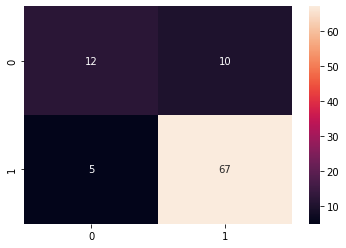

In [17]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNC
knn = KNC()
knn_model=knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, y_pred_knn)

#KNN heatmap
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True)


In [18]:
#Random forest
from sklearn.ensemble import RandomForestClassifier as rf
rf_model = rf().fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)


0.8723404255319149

<AxesSubplot:>

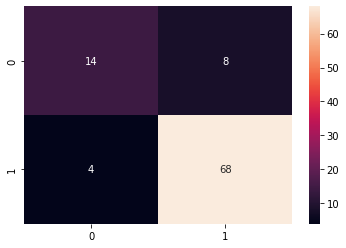

In [19]:

#rf heatmap
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True)

In [20]:


#SVM
from sklearn.svm import SVC as svm
svm_model = svm(kernel = "linear").fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.9042553191489362

<AxesSubplot:>

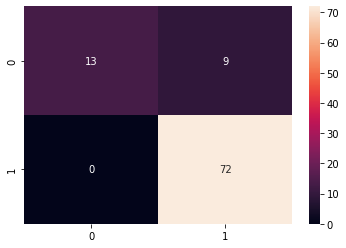

In [21]:
#SVM heatmap
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True)
